In [1]:
# Import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sqlalchemy import create_engine
import getpass

In [16]:
# Enter password for connection string
password = getpass.getpass()

········


In [17]:
# Create connection string
conn_string = "postgresql://postgres:" + password + "@b-team-final-project.cct7ahzel1ur.us-west-2.rds.amazonaws.com:5432/B_Team_Final_Project"

In [18]:
# Create the connection
conn=create_engine(conn_string)

In [5]:
# Import health_outcomes table and drop "countyfips"
health_outcomes = pd.read_sql(
    'health_outcomes',
    conn
)
health_outcomes = health_outcomes.apply(pd.to_numeric)
health_outcomes = health_outcomes.drop("countyfips", axis=1)
health_outcomes.dtypes

arthritis     float64
casthma       float64
bphigh        float64
cancer        float64
highchol      float64
kidney        float64
copd          float64
chd           float64
depression    float64
diabetes      float64
obesity       float64
teethlost     float64
stroke        float64
dtype: object

In [6]:
# Import health_risk_behaviors table and drop "countyfips"
risk_df = pd.read_sql(
    'health_risk_behaviors',
    conn
)
risk_df = risk_df.apply(pd.to_numeric)
risk_df = risk_df.drop("countyfips", axis=1)
risk_df


,binge,csmoking,lpa,sleep
0,13.6,17.4,38.5,37.7
1,21.5,21.7,30.3,36.8
2,17.1,18.7,32.1,34.2
3,18.2,15.3,20.5,34.4
4,13.5,21.8,39.1,37.3
...,...,...,...,...
3116,14.6,28.9,40.9,44.7
3117,15.6,17.3,32.3,36.9
3118,16.7,15.5,30.4,43.6
3119,17.9,17.4,29.7,32.5


In [27]:
# Join the two DataFrames on Index
risk_outcome_df = health_outcomes.merge(risk_df, left_index=True, right_index=True)
risk_outcome_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,binge,csmoking,lpa,sleep
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,13.6,17.4,38.5,37.7
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,21.5,21.7,30.3,36.8
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,17.1,18.7,32.1,34.2
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,18.2,15.3,20.5,34.4
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,13.5,21.8,39.1,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,14.6,28.9,40.9,44.7
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,15.6,17.3,32.3,36.9
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,16.7,15.5,30.4,43.6
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,17.9,17.4,29.7,32.5


In [8]:
# Set features and target
y = risk_outcome_df["cancer"].values.reshape(-1,1)
X = risk_outcome_df.drop('cancer', axis=1).values
X.shape

(3121, 16)

In [9]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [22]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2340, 16)
X_test: (781, 16)
Y_train: (2340, 1)
Y_test: (781, 1)


In [11]:
# Instantiate and fit a liner regression model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [23]:
# Create predictions
y_pred=linreg.predict(X_test)
y_pred[:10]

array([[6.1293995 ],
       [6.59367016],
       [6.1243403 ],
       [6.34400463],
       [6.54874779],
       [6.98502673],
       [5.46512502],
       [6.31570243],
       [5.10306201],
       [6.56234727]])

In [13]:
# Print the accuracy score
Accuracy=r2_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.91


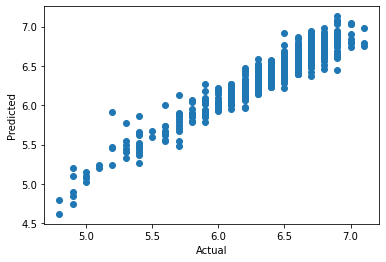

In [14]:
# Plot actual vs predicted
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [15]:
# Display a regression result using statsmodel
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1428.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:02:21   Log-Likelihood:                 2046.3
No. Observations:                3121   AIC:                            -4059.
Df Residuals:                    3104   BIC:                            -3956.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2284      0.075     83.020      0.0